# CMS3504 - Week 03 Lab Exercises: Basic Univariate Statistics

In this exercise, you will work through the calculation of some fundamental univariate statistics.
The primary aim here is to raise awareness of the underlying computation required for some common statistical methods.
This will motivate further consideration when dealing with standard data analysis when the data volume and complexity are high.

## Examples from the Lecture:

The following blocks are code examples from this week's lecture.
It is recommended that you run through these examples before attempting the lab exercise tasks.

In this week's exercise, we will make use of the package numpy and timeit.

`numpy`: https://numpy.org/devdocs/user/quickstart.html
`timeit`: https://docs.python.org/3/library/timeit.html

pandas has number methods for importing data from files and data stores, e.g. json, excel, csv, html, HDFS
See: https://pandas.pydata.org/pandas-docs/stable/reference/io.html

This week we will use the adult_full.data which contains 50% more instances than adult.data

In [1]:
%matplotlib notebook
#pandas untilites and methods are from the pandas package
import pandas as pd
import numpy as np

#We will use the timeit package to do test how long a calculate takes
#https://docs.python.org/3/library/timeit.html
import timeit

In [2]:
#pandas has a number helper methods for import data from files, e.g. csv, json
#Here we import data from a csv file
adult_data = pd.read_csv(r"C:\Users\Waqas\adult_full.data")

__Nominal Variables__

When working with nominal variables, it is often useful to find out all the unique values (labels) a variable can take.

In [3]:
#use the method unique to extract unique values of the occupation column
#n.b. with a pandas dataframe, we can also access a column as a field in an object
# the following is equivalent to adult_data['occupation']
occupations = adult_data.occupation.unique()

print(occupations)
#N.B: the method unique returns the results as a numpy array
print(type(occupations))

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
<class 'numpy.ndarray'>


In [4]:
#relationship column
relationship = adult_data.relationship.unique()
print(relationship)

[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


__Ordinal Variables__

There is no explicit ordinal variable in the adult data set.
However, as with any data analysi, we can use reasoning to treat certain columns as ordinal.
For example, it is reasonable to think the variable education can be ranked/ordered.

It is quite apparent from the code below, the values used in education is perhaps not arranged in the desired ranking order in the array. A possible solution is to associate an integer with each label using a dictionary.


In [5]:
#Education 
education = adult_data.education.unique()
print(education)

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


In [6]:
#create a education rank dictionary, please note I made up the ranks arbitrarily
education_rank = {' Bachelors':12, ' HS-grad':8, ' 11th':6, ' Masters':14, ' 9th':5, ' Some-college':11,
 ' Assoc-acdm':10, ' Assoc-voc':9, ' 7th-8th':4, ' Doctorate':15, ' Prof-school':13,
 ' 5th-6th':3, ' 10th':16, ' 1st-4th':2, ' Preschool':1, ' 12th':7}

__Frequency Distribution__

The Freuqncy Distribution (FD) of a nominal/ordinal variable is useful for indicating the spread of our data over the values of a variable.

This can be calculated manually or using a pandas built-in method.

In the example below, the execution time of the manual calculation and built-in method is also evaluated.
You can see which yields faster execution.

In [7]:
#calculate FD of education manually
fd_education = {' Bachelors':0, ' HS-grad':0, ' 11th':0, ' Masters':0, ' 9th':0, ' Some-college':0,' Assoc-acdm':0, ' Assoc-voc':0, ' 7th-8th':0, ' Doctorate':0, ' Prof-school':0,' 5th-6th':0, ' 10th':0, ' 1st-4th':0, ' Preschool':0, ' 12th':0}

#start the timer before entering the loop
start = timeit.default_timer()

for education in adult_data['education']:
       fd_education[education] = fd_education[education] + 1

#caluclate the elapsed time after the calculation is finished
elapsed = timeit.default_timer() - start
print(fd_education)
print('Execution time using manual method ', elapsed, ' seconds')

{' Bachelors': 8025, ' HS-grad': 15784, ' 11th': 1812, ' Masters': 2657, ' 9th': 756, ' Some-college': 10878, ' Assoc-acdm': 1601, ' Assoc-voc': 2061, ' 7th-8th': 955, ' Doctorate': 594, ' Prof-school': 834, ' 5th-6th': 509, ' 10th': 1389, ' 1st-4th': 247, ' Preschool': 83, ' 12th': 657}
Execution time using manual method  0.013551614999999906  seconds


In [8]:
#alternatively use the method value_counts
#start the timer before entering the loop
start = timeit.default_timer()
fd_education = pd.value_counts(adult_data.education)
elapsed = timeit.default_timer() - start
print(fd_education)
print('Execution time using built-in function ', elapsed, ' seconds')

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64
Execution time using built-in function  0.013481360000000109  seconds


__Histogram__

Histogram is similar to frequency distribution in that it also tells us how our data samples are spread over the values.
However, histograms should only be used for interval/ratio types variables where distance between values are numerically meaningful.

The example below use the age column of the data to demonstrate how histogram can be created.

In [9]:
#manual histogram
#it is possible to construct a histogram from the FD of a column
#first: get the frequency distribution of a column
fd_age = pd.value_counts(adult_data.age)
print(fd_age)

#second: then sort the FD in ascending order based on the value, note the ages is actually the indices
fd_age = fd_age.sort_index()
print(fd_age)

#Final step: Consolidate the FD into a number of designated bins. More often, the number of bins is much fewer
#than the number unique values. See Task 6

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64
17     595
18     862
19    1053
20    1113
21    1096
      ... 
86       1
87       3
88       6
89       2
90      55
Name: age, Length: 74, dtype: int64


<IPython.core.display.Javascript object>


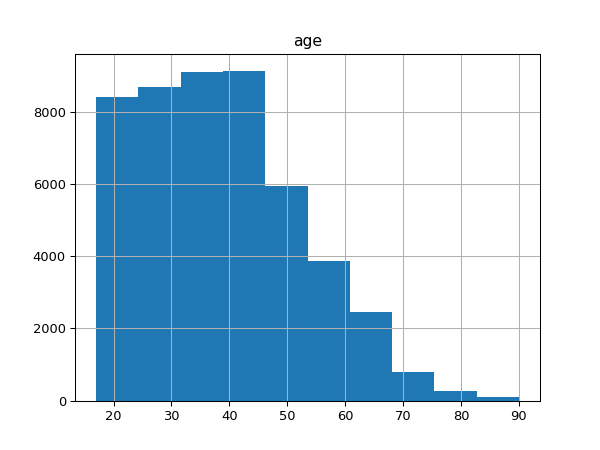

[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC696261C8>]]


<IPython.core.display.Javascript object>


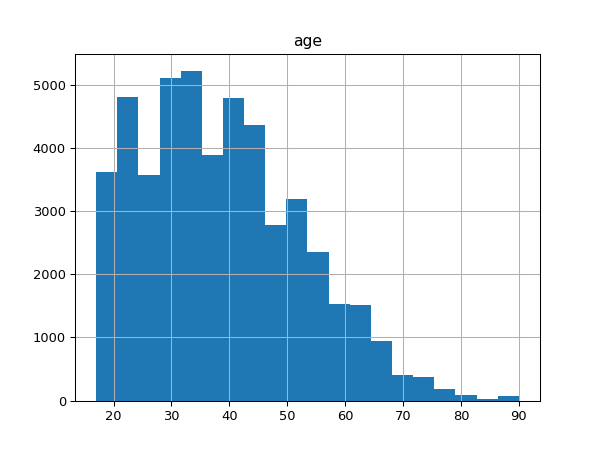

[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC6A042708>]]


<IPython.core.display.Javascript object>


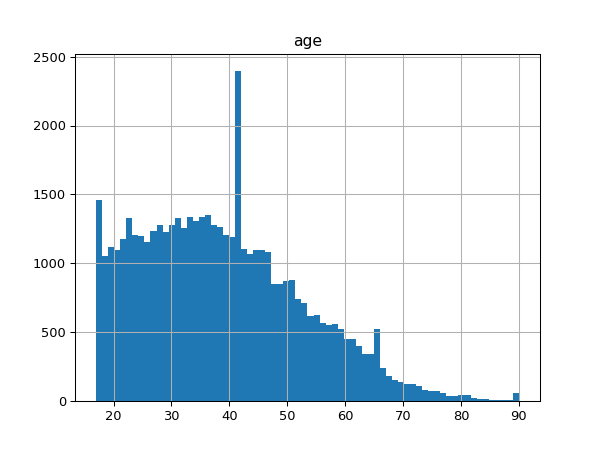

[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC6A099FC8>]]


In [10]:
#create histogram using the method hist
#a histogram with 10 bins
hist_age = adult_data.hist(column='age', bins=10)
print(hist_age)

#a histogram with 20 bins
hist_age = adult_data.hist(column='age', bins=20)
print(hist_age)

#a histogram with 70 bins, this is nearly 1 bin for each unique age in the data
hist_age = adult_data.hist(column='age', bins=70)
print(hist_age)

__Median__

The median of a variable is often referred to as the middle value of a given set of data.
This is predicated on the data must be sorted against the variable of interest.

The example below shows the process of calculating the median age of the adult data set.

pandas has built-in methods for some of the basic descriptive statistics:

`mean`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html#pandas.DataFrame.mean

`median`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html#pandas.DataFrame.median

`mode`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html#pandas.DataFrame.mode

`std`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html#pandas.DataFrame.std

`var`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html#pandas.DataFrame.var



In [11]:
start = timeit.default_timer()
#get the sorted values of the age column
ages_sorted = adult_data.age.sort_values()
#get the number samples in the data
count = len(ages_sorted)
#calculate the index to the middle of the data
middle = np.int(count*0.5)
if count % 2 == 0:
    median = 0.5*(ages_sorted.iloc[middle] + ages_sorted.iloc[middle + 1])
else:
    median = ages_sorted.iloc[middle]
    
elapsed = timeit.default_timer() - start
print('(Manual method) The median age is ',median)
print('Manual calculation took ', elapsed, ' seconds')

start = timeit.default_timer()
print('(Builtin method) The median age is ', adult_data.age.median())
elapsed = timeit.default_timer() - start
print('Built-in median took ', elapsed, ' seconds')

(Manual method) The median age is  37.0
Manual calculation took  0.004885164000000053  seconds
(Builtin method) The median age is  37.0
Built-in median took  0.0011933820000002981  seconds


## Exercise Tasks: Complete the following tasks 

__Task 1:__ 

Calculate the frequency distribution for each of the following attributes:
- education
- workclass
- occupation
- Marital-status
- relationship

and organise the results into a python dictionary.

In [12]:
#calculate the frequency distributions of each attribute using the 'value.counts()' method of pandas
fd_education = pd.value_counts(adult_data.education)
fd_workclass = pd.value_counts(adult_data.workclass)
fd_occupation = pd.value_counts(adult_data.occupation)
fd_maritalstatus = pd.value_counts(adult_data.iloc[:,5])
fd_relationship = pd.value_counts(adult_data.relationship)

#create and print dictionary with the calculated fds
dictionary = dict([("fd_education", fd_education),
                   ("fd_workclass", fd_workclass),
                   ("fd_occupation", fd_occupation),
                   ("fd_maritalstatus", fd_maritalstatus),
                   ("fd_relationship", fd_relationship)])
                   
print(dictionary)

{'fd_education':  HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64, 'fd_workclass':  Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64, 'fd_occupation':  Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 ?                    2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farmin

__Task 2:__ 

Similar to __Task 1__, but this time, only calculate the frequency ditribution for those meeting the following criteria:
- age < 65
- native_country is not United-States
- salary is <=50K

Organise the results into a python dictionary

In [13]:
#narrow down and store the entries of adult_data according to the specified criteria
criteria = adult_data[(adult_data['age'] < 65) & (adult_data['salary'] == ' <=50K') & (adult_data['native-country'] != ' United-States')]

#calculate the frequency distributions of each attribute in criteria using the 'value.counts()' method of pandas
fd_education = pd.value_counts(criteria.education)
fd_workclass = pd.value_counts(criteria.workclass)
fd_occupation = pd.value_counts(criteria.occupation)
fd_maritalstatus = pd.value_counts(criteria.iloc[:,5])
fd_relationship = pd.value_counts(criteria.relationship)

#create and print dictionary with the calculated fds
dictionary = dict([("fd_education", fd_education),
                   ("fd_workclass", fd_workclass),
                   ("fd_occupation", fd_occupation),
                   ("fd_maritalstatus", fd_maritalstatus),
                   ("fd_relationship", fd_relationship)])
                   
print(dictionary)

{'fd_education':  HS-grad         685
 Some-college    453
 Bachelors       373
 5th-6th         220
 7th-8th         132
 9th             113
 1st-4th         112
 11th            101
 Masters          98
 10th             79
 Assoc-voc        66
 12th             63
 Assoc-acdm       63
 Preschool        32
 Doctorate        25
 Prof-school      24
Name: education, dtype: int64, 'fd_workclass':  Private             2091
 Self-emp-not-inc     157
 ?                    141
 Local-gov             93
 State-gov             60
 Self-emp-inc          59
 Federal-gov           38
Name: workclass, dtype: int64, 'fd_occupation':  Other-service        480
 Craft-repair         338
 Machine-op-inspct    282
 Adm-clerical         263
 Sales                226
 Prof-specialty       226
 Exec-managerial      177
 Handlers-cleaners    167
 ?                    141
 Farming-fishing      108
 Transport-moving      90
 Priv-house-serv       55
 Tech-support          52
 Protective-serv       34
Name: 

__Task 3:__ 

Find out the mean, median, mode and standard deviation of hours-per-week and education-num for those meeting the following criteria:
- age > 50
- Marital-status is either divorce, separated, Widowed or Never-married

Organise the results into a python dictionary.

In [14]:
#narrow down and store the entries of adult_data according to the specified criteria
criteria = adult_data[((adult_data['Marital-status'] == " Divorced") |
                          (adult_data['Marital-status'] == " Separated") |
                          (adult_data['Marital-status'] == " Widowed") |
                          (adult_data['Marital-status'] == " Never-married"))
                      & (adult_data['age'] > 50)]

#declare and initialise calculation variables
total_hrs = 0
total_edu = 0
#iterate through each entry in criteria
for i in range(len(criteria)):
    #calculate the sum of the specified attributes per entry
    total_hrs = total_hrs + criteria.iat[i,12]
    total_edu = total_edu + criteria.iat[i,4]

#create and print dictionary with the calculated statistical measures
#calculate the mean variables by dividing the 'total' variables by the number of entries in criteria
#calculate the median, mode and std variables using the built-in pandas methods
dictionary = dict([("Mean hours-per-week:", total_hrs/len(criteria)),
                   ("Mean education-num:", total_edu/len(criteria)),
                   ("Median hours-per-week:", criteria.iloc[:,12].median()),
                   ("Median education-num:", criteria.iloc[:,4].median()),
                   ("Mode hours-per-week:", criteria.iloc[:,12].mode()),
                   ("Mode education-num:", criteria.iloc[:,4].mode()),
                   ("Standard deviation of hours-per-week:", criteria.iloc[:,12].std()),
                   ("Standard deviation of education-num:", criteria.iloc[:,4].std())])
print(dictionary)

{'Mean hours-per-week:': 36.858126721763085, 'Mean education-num:': 9.4900826446281, 'Median hours-per-week:': 40.0, 'Median education-num:': 9.0, 'Mode hours-per-week:': 0    40
dtype: int64, 'Mode education-num:': 0    9
dtype: int64, 'Standard deviation of hours-per-week:': 13.756412721024006, 'Standard deviation of education-num:': 2.890065412115529}


__Task 4:__ 

Data analyses often yield more interesting observation when variables are examined together.
In this task, you are required to find out if education can be used to predict the occupation of an individual.
As this module is not about machine learning or data mining, you are only required to manually examine the data based on the distribution in these two attributes.

Hint: For this, you need to first create a reasonable ordinal rank for the values in education and occupation, e.g. one may say Adm-clerical ranks lower than Exec-managerial, Doctorate is higher than Prof-school
This will be up to you to justify.
Once this is completed, present the histogram or frequency distribution of these two variables.

What can you find out from their shapes? Do they look similar or dissimilar?

    The shapes of the frequency distributions look weakly correlated.

<IPython.core.display.Javascript object>


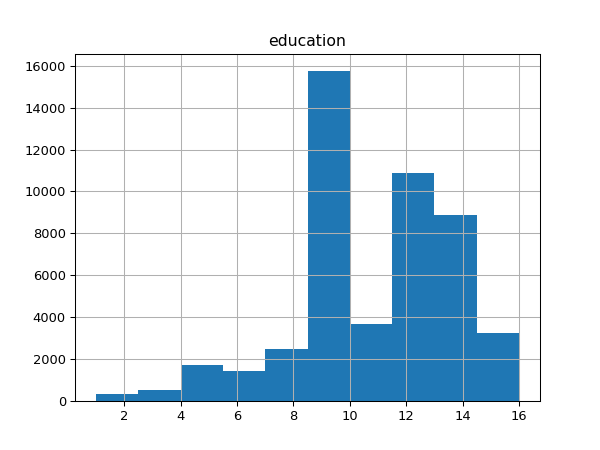

<IPython.core.display.Javascript object>


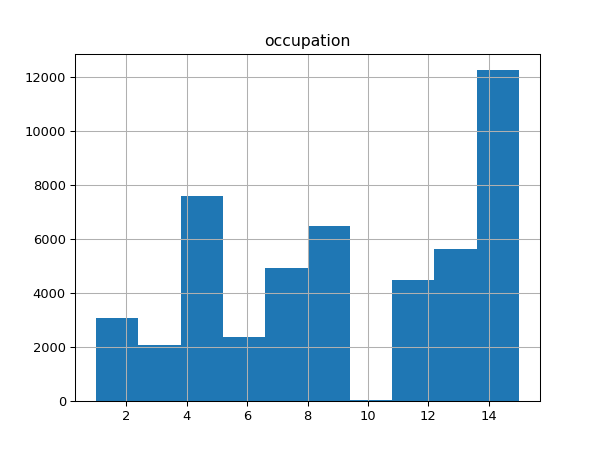

[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC6A10BB48>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC6A251808>]]


In [15]:
#create education rank and occupation dictionaries using educated estimations for the rankings
edu_rank = {' Bachelors':13,' HS-grad':9, ' 11th':7, ' Masters':15, ' 9th':5, ' Some-college':12,
 ' Assoc-acdm':11, ' Assoc-voc':10, ' 7th-8th':4, ' Doctorate':16, ' Prof-school':14,
 ' 5th-6th':3, ' 10th':6, ' 1st-4th':2, ' Preschool':1, ' 12th':8}
 
occ_rank = {' Adm-clerical':13, ' Exec-managerial':14, ' Handlers-cleaners':3, ' Prof-specialty':15,
 ' Other-service':7, ' Sales':8, ' Craft-repair':4, ' Transport-moving':6,
 ' Farming-fishing':5, ' Machine-op-inspct':11, ' Tech-support':12, ' ?':1,
 ' Protective-serv':9, ' Armed-Forces':10, ' Priv-house-serv':2}

#create a new version of adult_data incorporating the newly created ranking dictionaries    
adult_data_v2 = adult_data.replace(edu_rank).replace(occ_rank)

#create histograms based on the education and occupation columns derived from the new
#version of adult_data
hist_edu = adult_data_v2.hist(column='education')
hist_occ = adult_data_v2.hist(column='occupation')

print(hist_edu)
print(hist_occ)

__Task 5:__ 

Similar to __Task 4__, find out if the variable education-num is indicative of the education variable.
i.e. We want to know if the number of year in education is consistent with the education qualification attained.

<IPython.core.display.Javascript object>


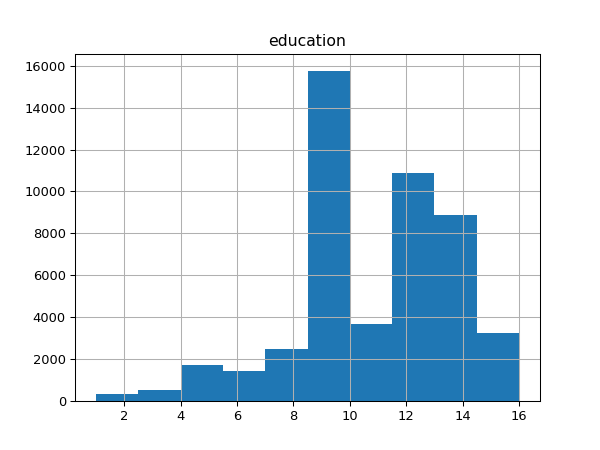

<IPython.core.display.Javascript object>


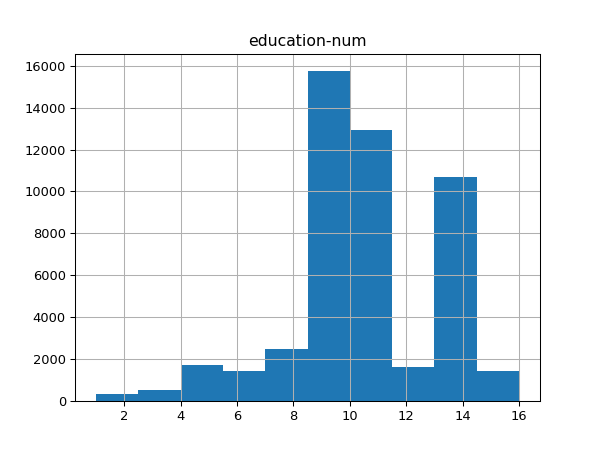

In [16]:
 edu_rank = {' Bachelors':13,' HS-grad':9, ' 11th':7, ' Masters':15, ' 9th':5, ' Some-college':12,
 ' Assoc-acdm':11, ' Assoc-voc':10, ' 7th-8th':4, ' Doctorate':16, ' Prof-school':14,
 ' 5th-6th':3, ' 10th':6, ' 1st-4th':2, ' Preschool':1, ' 12th':8}

#create a new version of adult_data incorporating just the edu_rank dictionary 
adult_data_v3 = adult_data.replace(edu_rank)

#create histograms based on the education-num and the education column derived
#from the new version of adult_data
hist_edu = adult_data_v3.hist(column='education')
hist_edunum = adult_data_v3.hist(column='education-num')

__Task 6:__

Complete the following python script to manually construct a histogram for the age column. Your starting point is the manual histogram example.

The requirements for this histogram is the followings:
- The histogram must consist of 8 bins for <18, 18-24, 25-35, 36-45, 46-55, 56-65, 66-75 and 75>
- The resulting histogram should be stored as a dictionary with the keys indicating the age ranges and value for the frequency counts

N.B. You are not required to plot the histogram but you need to make sure the frequency in each bin is correctly counted.

17     595
18     862
19    1053
20    1113
21    1096
      ... 
86       1
87       3
88       6
89       2
90      55
Name: age, Length: 74, dtype: int64


<IPython.core.display.Javascript object>


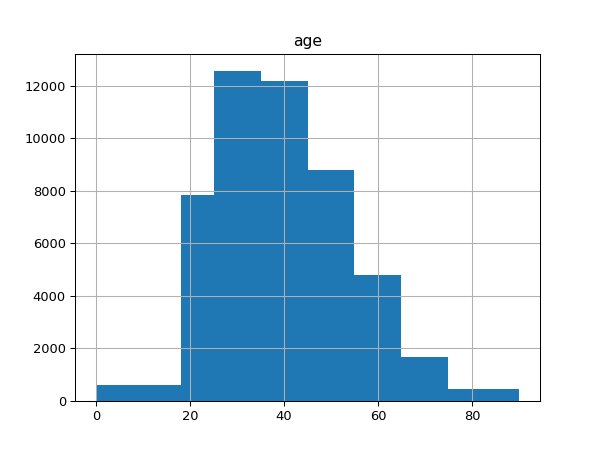

In [17]:
import matplotlib.pyplot as plt
#manual histogram
#it is possible to construct a histogram from the FD of a column
#first: get the frequency distribution of a column
fd_age = pd.value_counts(adult_data.age)

#second: then sort the FD in ascending order based on the value, note the ages is actually the indices
fd_age = fd_age.sort_index()
print(fd_age)

#Final step: Consolidate the FD into a number of designated bins. More often, the number of bins is much fewer
#than the number unique values. See Task 6

#define the bins as per the task statement
custom_bins = [0, 18, 25, 35, 45, 55, 65, 75, 90]
#use the pandas.DataFrame.hist() method to create a histogram with the specified bins
hist_age = adult_data.hist(column='age', bins=custom_bins)